## Task 2 - To Explore Supervised Machine Learning

In this regression task we have to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

The problem we are solving is :

*What will be predicted score if a student study for 9.25 hrs in a day ?*

In [1]:
# Importing the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Importing the dataset
dataset = pd.read_csv("dataset/scores_data.csv")
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


From the data we can see that there are no missing values so we can proceed further and we can train the data.

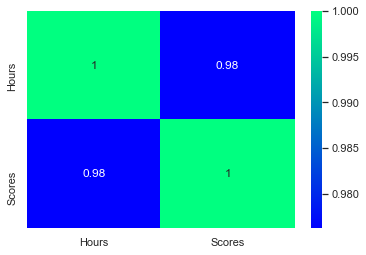

In [3]:
# Checking the correlation between number of hours studied and marks scored
data = dataset.corr()
sns.heatmap(data, annot = True, cmap = "winter")

From the graph we can that Hours and Scores are highly correlated ie 98%

In [4]:
# Preparing data for traing model
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
X.shape

(25, 1)

In [6]:
y.shape

(25,)

In [7]:
# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
X_train.shape

(20, 1)

In [9]:
X_test.shape

(5, 1)

In [10]:
y_train.shape

(20,)

In [11]:
y_test.shape

(5,)

In [12]:
# Training the Simple Linear Regression model on Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [14]:
# Comparing Actual vs Predicted test results
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


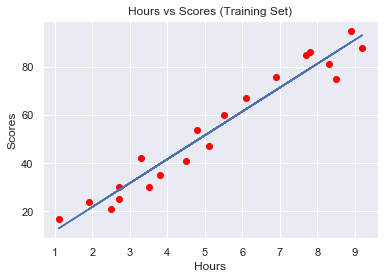

In [15]:
# Visualizing the Training set results
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train))
plt.title("Hours vs Scores (Training Set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

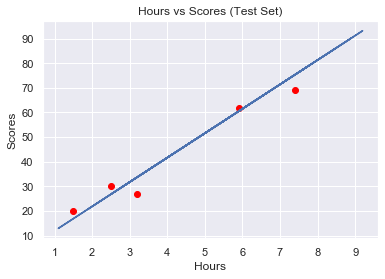

In [16]:
# Visualizing the Test set results
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regressor.predict(X_train))
plt.title("Hours vs Scores (Test Set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [17]:
# Checking Accuracy of Training and Test data
print(f"The Accuracy of Training data : {regressor.score(X_train, y_train)}")
print(f"The Accuracy of Test data : {regressor.score(X_test, y_test)}")

The Accuracy of Training data : 0.9515510725211553
The Accuracy of Test data : 0.9454906892105356


Thus we can say that accuracy of our regressor model is 94.5%

In [31]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Mean Squared Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975


In [32]:
# Predicting the result for input of 9.25 Hours
hour = [[9.25]]
pred = regressor.predict(hour)
print(f"Number of Hours: {hour}")
print(f"Predicted Score: {pred}")

Number of Hours: [[9.25]]
Predicted Score: [93.69173249]
